In [2]:
import scipy.io
import numpy as np
import pandas as pd
from pandas.io.parsers import read_csv
import dateutil
from dateutil.parser import parse
import pylab
from matplotlib import pyplot as plt
from IPython import get_ipython
import datetime
import matplotlib.dates
import math
from tqdm import tqdm_notebook
from scipy.signal import savgol_filter

%matplotlib inline
plt.style.use('dark_background')

In [3]:
master_df = pd.read_csv('../processed_data/master_dataset.csv')

In [4]:
master_df.CountryName.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'United Arab Emirates',
       'Argentina', 'Australia', 'Austria', 'Belgium', 'Benin',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia', 'Brazil',
       'Barbados', 'Botswana', 'Canada', 'Switzerland', 'Chile',
       'Cameroon', 'Colombia', 'Cape Verde', 'Costa Rica', 'Germany',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'Spain',
       'Estonia', 'Finland', 'France', 'Gabon', 'United Kingdom',
       'Georgia', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Honduras',
       'Croatia', 'Hungary', 'Indonesia', 'India', 'Ireland', 'Iraq',
       'Israel', 'Italy', 'Jamaica', 'Jordan', 'Japan', 'Kazakhstan',
       'Kenya', 'South Korea', 'Kuwait', 'Laos', 'Lebanon', 'Libya',
       'Sri Lanka', 'Lithuania', 'Luxembourg', 'Moldova', 'Mexico',
       'Mali', 'Mongolia', 'Mozambique', 'Mauritius', 'Malaysia',
       'Namibia', 'Niger', 'Nigeria', 'Nicaragua

In [5]:
master_df.CountryCode.unique()

array(['ABW', 'AFG', 'AGO', 'ARE', 'ARG', 'AUS', 'AUT', 'BEL', 'BEN',
       'BFA', 'BGD', 'BGR', 'BHR', 'BIH', 'BLR', 'BLZ', 'BOL', 'BRA',
       'BRB', 'BWA', 'CAN', 'CHE', 'CHL', 'CMR', 'COL', 'CPV', 'CRI',
       'DEU', 'DNK', 'DOM', 'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FRA',
       'GAB', 'GBR', 'GEO', 'GHA', 'GRC', 'GTM', 'HKG', 'HND', 'HRV',
       'HUN', 'IDN', 'IND', 'IRL', 'IRQ', 'ISR', 'ITA', 'JAM', 'JOR',
       'JPN', 'KAZ', 'KEN', 'KOR', 'KWT', 'LAO', 'LBN', 'LBY', 'LKA',
       'LTU', 'LUX', 'MDA', 'MEX', 'MLI', 'MNG', 'MOZ', 'MUS', 'MYS',
       'NAM', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN',
       'PAK', 'PAN', 'PER', 'PHL', 'PNG', 'POL', 'PRI', 'PRT', 'PRY',
       'QAT', 'ROU', 'RWA', 'SAU', 'SEN', 'SGP', 'SLV', 'SRB', 'SVN',
       'SWE', 'THA', 'TTO', 'TUR', 'TZA', 'UGA', 'URY', 'USA', 'VEN',
       'VNM', 'YEM', 'ZAF', 'ZMB', 'ZWE', 'TWN'], dtype=object)

In [6]:
master_df.columns

Index(['Unnamed: 0', 'CountryName', 'CountryCode', 'Date', 'C1_School closing',
       'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events',
       'C3_Flag', 'C4_Restrictions on gatherings', 'C4_Flag',
       'C5_Close public transport', 'C5_Flag', 'C6_Stay at home requirements',
       'C6_Flag', 'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndex',
       'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex',
       'Conta

In [7]:
def make_df():
    new_df = pd.DataFrame()
    new_df['CountryName'] = master_df.CountryName.unique()
    new_df['CountryCode'] = master_df.CountryCode.unique()
    
    #work places
    dates = []
    u30work_vals = []
    gov_index_work = []
    cont_index_work = []
    econ_index_work = []
    strin_index_work = []
    cases = []
    for country in new_df['CountryCode']:
        country_df = master_df[master_df.CountryCode == country]
        idx = (country_df['workplaces_percent_change_from_baseline'] >= -30).idxmin()
        date = country_df['Date'].loc[idx]
        dates.append(date)
        u30work_val = country_df['workplaces_percent_change_from_baseline'].loc[idx]
        u30work_vals.append(u30work_val)
        
        gov_index = country_df['GovernmentResponseIndex'].loc[idx]
        gov_index_work.append(gov_index)
        cont_index = country_df['ContainmentHealthIndex'].loc[idx]
        cont_index_work.append(cont_index)
        econ_index = country_df['EconomicSupportIndex'].loc[idx]
        econ_index_work.append(econ_index)
        strin_index = country_df['StringencyIndex'].loc[idx]
        strin_index_work.append(strin_index)
        cases_index = country_df['ConfirmedCases'].loc[idx]
        cases.append(cases_index)
    new_df['date_work_under_30'] = dates
    new_df['val_work_under_30'] = u30work_vals
    new_df['gov_index_work'] = gov_index_work
    new_df['cont_index_work'] = cont_index_work
    new_df['econ_index_work'] = econ_index_work
    new_df['strin_index_work'] = strin_index_work
    new_df['cases_work'] = cases
    
    #transit
    dates_tran= []
    u30tran_vals = []
    gov_index_tran = []
    cont_index_tran = []
    econ_index_tran = []
    strin_index_tran = []
    cases_tran = []
    for country in new_df['CountryCode']:
        country_df = master_df[master_df.CountryCode == country]
        idx = (country_df['transit_stations_percent_change_from_baseline'] >= -30).idxmin()
        date = country_df['Date'].loc[idx]
        dates_tran.append(date)
        u30tran_val = country_df['transit_stations_percent_change_from_baseline'].loc[idx]
        u30tran_vals.append(u30tran_val)
        
        gov_index = country_df['GovernmentResponseIndex'].loc[idx]
        gov_index_tran.append(gov_index)
        cont_index = country_df['ContainmentHealthIndex'].loc[idx]
        cont_index_tran.append(cont_index)
        econ_index = country_df['EconomicSupportIndex'].loc[idx]
        econ_index_tran.append(econ_index)
        strin_index = country_df['StringencyIndex'].loc[idx]
        strin_index_tran.append(strin_index)
        cases_index = country_df['ConfirmedCases'].loc[idx]
        cases_tran.append(cases_index)
    new_df['date_tran_under_30'] = dates_tran
    new_df['val_tran_under_30'] = u30tran_vals
    new_df['gov_index_tran'] = gov_index_tran
    new_df['cont_index_tran'] = cont_index_tran
    new_df['econ_index_tran'] = econ_index_tran
    new_df['strin_index_tran'] = strin_index_tran
    new_df['cases_tran'] = cases_tran
    return new_df

In [8]:
new_df = make_df()
new_df

,CountryName,CountryCode,date_work_under_30,val_work_under_30,gov_index_work,cont_index_work,econ_index_work,strin_index_work,cases_work,date_tran_under_30,val_tran_under_30,gov_index_tran,cont_index_tran,econ_index_tran,strin_index_tran,cases_tran
0,Aruba,ABW,2020-02-24,-62.0,0.00,0.00,0.0,0.00,0.0,2020-03-18,-49.0,23.72,28.03,0.0,30.56,3.428571
1,Afghanistan,AFG,2020-03-21,-36.0,31.41,37.12,0.0,36.11,24.0,2020-03-28,-32.0,49.36,58.33,0.0,62.04,91.000000
2,Angola,AGO,2020-02-24,-63.0,3.85,4.55,0.0,5.56,0.0,2020-03-22,-41.0,10.26,12.12,0.0,11.11,2.000000
3,United Arab Emirates,ARE,2020-03-25,-35.0,66.67,69.70,50.0,70.37,248.0,2020-03-19,-31.0,41.67,49.24,0.0,45.37,113.000000
4,Argentina,ARG,2020-02-24,-54.0,7.69,9.09,0.0,11.11,0.0,2020-03-17,-32.0,35.26,41.67,0.0,41.67,65.000000
5,Australia,AUS,2020-03-29,-33.0,67.31,65.91,75.0,71.30,3809.0,2020-03-22,-34.0,44.87,48.48,NaN,44.44,1098.000000
6,Austria,AUT,2020-03-16,-43.0,70.51,74.24,50.0,81.48,860.0,2020-03-14,-34.0,42.31,50.00,0.0,51.85,504.000000
7,Belgium,BEL,2020-03-16,-36.0,55.13,49.24,87.5,50.93,886.0,2020-03-14,-34.0,55.13,49.24,87.5,50.93,559.000000
8,Benin,BEN,2020-04-13,-50.0,51.60,60.98,0.0,59.72,35.0,2020-04-13,-35.0,51.60,60.98,0.0,59.72,35.000000
9,Burkina Faso,BFA,2020-03-09,-41.0,10.26,12.12,0.0,0.00,0.0,2020-03-22,-34.0,60.90,71.97,0.0,73.15,64.000000


In [9]:
taiwan = master_df[master_df.CountryCode == 'ABW']
taiwan

,Unnamed: 0,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,...,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,Aruba,ABW,2020-02-15,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-15,2.0,3.0,12.0,26.0,-2.0,-2.000000
1,1,Aruba,ABW,2020-02-16,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-16,-1.0,-9.0,4.0,1.0,-1.0,2.000000
2,2,Aruba,ABW,2020-02-17,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-17,-1.0,-1.0,16.0,-4.0,-20.0,6.000000
3,3,Aruba,ABW,2020-02-18,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-18,-2.0,-5.0,8.0,2.0,-13.0,4.000000
4,4,Aruba,ABW,2020-02-19,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-19,1.0,-8.0,3.0,4.0,-14.0,4.000000
5,5,Aruba,ABW,2020-02-20,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-20,4.0,-1.0,0.0,29.0,-13.0,1.000000
6,6,Aruba,ABW,2020-02-21,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-21,7.0,9.0,9.0,1.0,-15.0,1.000000
7,7,Aruba,ABW,2020-02-22,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-22,-2.0,10.0,-4.0,13.0,-6.0,-2.000000
8,8,Aruba,ABW,2020-02-23,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-23,14.0,-15.0,21.0,16.0,-8.0,-5.000000
9,9,Aruba,ABW,2020-02-24,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-24,-23.0,-30.0,24.0,-18.0,-62.0,18.000000


In [10]:
taiwan['transit_stations_percent_change_from_baseline'].describe()

count    92.000000
mean    -41.739130
std      33.570614
min     -92.000000
25%     -68.000000
50%     -55.000000
75%       0.000000
max      29.000000
Name: transit_stations_percent_change_from_baseline, dtype: float64

In [11]:
def make_df():
    new_df = pd.DataFrame()
    new_df['CountryName'] = master_df.CountryName.unique()
    new_df['CountryCode'] = master_df.CountryCode.unique()
    
    #work places
    dates = []
    u30work_vals = []
    for country in new_df['CountryCode']:
        country_df = master_df[master_df.CountryCode == country]
        idx = (country_df['workplaces_percent_change_from_baseline'] >= -30).idxmin()
        date = country_df['Date'].loc[idx]
        dates.append(date)
        u30work_val = country_df['workplaces_percent_change_from_baseline'].loc[idx]
        u30work_vals.append(u30work_val)
    new_df['date_work_under_30'] = dates
    new_df['val_work_under_30'] = u30work_vals
    return new_df

In [12]:
df = make_df()
df

,CountryName,CountryCode,date_work_under_30,val_work_under_30
0,Aruba,ABW,2020-02-24,-62.0
1,Afghanistan,AFG,2020-03-21,-36.0
2,Angola,AGO,2020-02-24,-63.0
3,United Arab Emirates,ARE,2020-03-25,-35.0
4,Argentina,ARG,2020-02-24,-54.0
5,Australia,AUS,2020-03-29,-33.0
6,Austria,AUT,2020-03-16,-43.0
7,Belgium,BEL,2020-03-16,-36.0
8,Benin,BEN,2020-04-13,-50.0
9,Burkina Faso,BFA,2020-03-09,-41.0


In [13]:
usa = master_df[master_df.CountryCode == 'USA']
mob_sg = savgol_filter(usa['retail_and_recreation_percent_change_from_baseline'], 25, 3)
initial = usa['Unnamed: 0'].iloc[0]
usa['Day'] = usa['Unnamed: 0'].apply(lambda x: x - initial)
usa['smooth'] = mob_sg
usa['smooth'].min()
x = usa[usa['GovernmentResponseIndexForDisplay']!= 0]
x['GovernmentResponseIndexForDisplay'].mean()
"""
'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
"""

/Users/nikhilmehta1/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/Users/nikhilmehta1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/nikhilmehta1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

"\n'retail_and_recreation_percent_change_from_baseline',\n       'grocery_and_pharmacy_percent_change_from_baseline',\n       'parks_percent_change_from_baseline',\n       'transit_stations_percent_change_from_baseline',\n       'workplaces_percent_change_from_baseline',\n       'residential_percent_change_from_baseline'],\n"

In [14]:
from copy import copy

def smooth_df():
    new_df = pd.DataFrame()
    new_df['CountryName'] = master_df.CountryName.unique()
    new_df['CountryCode'] = master_df.CountryCode.unique()
    for country in new_df['CountryCode']:
        country_df = master_df[master_df.CountryCode == country].copy()
        master_df['smooth_workplaces_percent_change_from_baseline'] = 0
        minind = country_df['Unnamed: 0'].min()
        maxind = country_df['Unnamed: 0'].max()
        mob_sg = savgol_filter(country_df['workplaces_percent_change_from_baseline'], 25, 3)
        country_df['smooth_workplaces_percent_change_from_baseline'] = mob_sg.copy()


        #master_df['smooth_workplaces_percent_change_from_baseline'] = country_df['smooth_workplaces_percent_change_from_baseline']
        master_df['smooth_workplaces_percent_change_from_baseline'].iloc[minind:maxind] = country_df['smooth_workplaces_percent_change_from_baseline']
    return master_df
smooth_df()

/Users/nikhilmehta1/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/Users/nikhilmehta1/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Unnamed: 0,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,...,EconomicSupportIndex,EconomicSupportIndexForDisplay,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,smooth_workplaces_percent_change_from_baseline
0,0,Aruba,ABW,2020-02-15,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.0,2020-02-15,2.0,3.0,12.0,26.0,-2.0,-2.000000,0.000000
1,1,Aruba,ABW,2020-02-16,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.0,2020-02-16,-1.0,-9.0,4.0,1.0,-1.0,2.000000,0.000000
2,2,Aruba,ABW,2020-02-17,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.0,2020-02-17,-1.0,-1.0,16.0,-4.0,-20.0,6.000000,0.000000
3,3,Aruba,ABW,2020-02-18,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.0,2020-02-18,-2.0,-5.0,8.0,2.0,-13.0,4.000000,0.000000
4,4,Aruba,ABW,2020-02-19,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.0,2020-02-19,1.0,-8.0,3.0,4.0,-14.0,4.000000,0.000000
5,5,Aruba,ABW,2020-02-20,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.0,2020-02-20,4.0,-1.0,0.0,29.0,-13.0,1.000000,0.000000
6,6,Aruba,ABW,2020-02-21,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.0,2020-02-21,7.0,9.0,9.0,1.0,-15.0,1.000000,0.000000
7,7,Aruba,ABW,2020-02-22,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.0,2020-02-22,-2.0,10.0,-4.0,13.0,-6.0,-2.000000,0.000000
8,8,Aruba,ABW,2020-02-23,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.0,2020-02-23,14.0,-15.0,21.0,16.0,-8.0,-5.000000,0.000000
9,9,Aruba,ABW,2020-02-24,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.0,2020-02-24,-23.0,-30.0,24.0,-18.0,-62.0,18.000000,0.000000


In [15]:
master_df=pd.read_csv('../processed_data/master_dataset.csv')

master_df.columns

Index(['Unnamed: 0', 'CountryName', 'CountryCode', 'Date', 'C1_School closing',
       'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events',
       'C3_Flag', 'C4_Restrictions on gatherings', 'C4_Flag',
       'C5_Close public transport', 'C5_Flag', 'C6_Stay at home requirements',
       'C6_Flag', 'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndex',
       'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex',
       'Conta

In [16]:
cols = [
      'GovernmentResponseIndexForDisplay',
      'ContainmentHealthIndexForDisplay',
      'EconomicSupportIndexForDisplay',
      'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']
for col in cols: 
    master_df['smooth_'+col] = 0
    for cc in master_df['CountryCode'].unique():
        ts_data = np.array(master_df[col][master_df['CountryCode'] == cc])
        print(ts_data)

        mob_sg = savgol_filter(ts_data, 25, 3)

        #master_df['smooth_workplaces_percent_change_from_baseline'] = country_df['smooth_workplaces_percent_change_from_baseline']
        master_df['smooth_'+col][master_df['CountryCode'] == cc] = mob_sg


[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  2.56  2.56  2.56  2.56  2.56  8.33 16.03 16.03 23.72 27.56 27.56 35.26
 35.26 35.26 35.26 35.26 35.26 35.26 35.26 63.46 63.46 63.46 71.15 71.15
 71.15 71.15 71.15 71.15 71.15 71.15 71.15 73.72 71.15 73.72 73.72 71.15
 71.15 71.15 71.15 73.08 73.08 71.15 71.15 71.15 71.15 71.15 71.15 71.15
 71.15 71.15 71.15 71.15 71.15 71.15 71.15 68.59 68.59 68.59 68.59 68.59
 68.59 68.59 68.59 68.59 68.59 68.59 68.59 68.59]
[ 0.    0.    0.    0.    0.    0.    0.    0.    2.56  6.41  6.41  6.41
  6.41  6.41  6.41 19.87 21.79 21.79 21.79 21.79 21.79 21.79 21.79 21.79
 21.79 21.79 21.79 21.79 29.49 29.49 29.49 29.49 31.41 31.41 31.41 31.41
 31.41 31.41 37.82 43.59 43.59 43.59 49.36 49.36 49.36 49.36 49.36 49.36
 49.36 49.36 57.05 57.05 57.05 57.05 57.05 57.05 57.05 60.9  60.9  60.9
 60.9  60.9  60.9  60.9  60.9  60.9  60.9  60.9  60.9  60.9  60.9  60.9
 60.9  

/Users/nikhilmehta1/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/Users/nikhilmehta1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[ 1.92  1.92  1.92  1.92  1.92  1.92  1.92  5.77  5.77  5.77  5.77  5.77
  5.77  5.77  5.77  9.62  9.62  9.62  9.62  9.62  9.62 17.31 19.87 19.87
 19.87 19.87 19.87 19.87 27.56 27.56 29.49 37.18 37.18 37.18 37.18 37.18
 37.18 37.18 37.18 37.18 37.18 37.18 37.18 37.18 51.6  51.6  51.6  51.6
 51.6  51.6  51.6  51.6  51.6  51.6  51.6  51.6  51.6  51.6  51.6  51.6
 51.6  51.6  51.6  51.6  51.6  54.17 54.17 54.17 54.17 54.17 54.17 54.17
 54.17 54.17 54.17 54.17 54.17 54.17 54.17 54.17 54.17 54.17 54.17 54.17
 54.17 54.17 45.83 45.83 45.83 45.83 45.83 45.83]
[ 2.56  2.56  2.56  2.56  2.56  2.56  2.56  2.56  2.56  2.56  2.56  2.56
  2.56  2.56  2.56  2.56  2.56  2.56  2.56  2.56  2.56  2.56  2.56 10.26
 10.26 10.26 17.95 17.95 17.95 17.95 33.33 33.33 33.33 33.33 33.33 60.9
 60.9  68.59 68.59 68.59 68.59 68.59 68.59 68.59 68.59 68.59 68.59 68.59
 68.59 68.59 68.59 68.59 68.59 68.59 68.59 68.59 68.59 68.59 68.59 68.59
 68.59 68.59 68.59 68.59 68.59 68.59 68.59 68.59 68.59 68.59 68.59 68.59
 68.

[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 11.54 11.54 11.54 11.54 11.54 16.67 16.67 16.67 28.21 28.21 28.21 33.97
 37.82 44.87 44.87 59.62 61.54 61.54 61.54 61.54 66.03 66.03 66.03 66.03
 66.03 66.03 66.03 66.03 66.03 66.03 66.03 66.03 66.03 66.03 66.03 66.03
 66.03 66.03 66.03 66.03 66.03 66.03 66.03 66.03 66.03 66.03 66.03 66.03
 63.46 63.46 63.46 71.15 71.15 73.72 73.72 73.72 77.56 77.56 77.56 77.56
 77.56 77.56 77.56 77.56 77.56 77.56 77.56 77.56 77.56 77.56 77.56 75.64
 75.64 75.64 75.64 78.21 78.21 78.21 78.21 78.21]
[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    7.69  7.69  7.69  7.69  7.69  7.69  7.69  7.69
  7.69  7.69 11.54 11.54 11.54 11.54 19.87 22.44 22.44 52.56 60.26 60.26
 65.38 65.38 71.15 71.15 71.15 75.   75.   75.   75.   75.   75.   75.
 75.   75.   75.   75.   75.   75.   75.   75.   75.   75.   75.   75.
 75.   75.   75.   77.56 77.56 77.56 77.56 77.56 77.56 77.56 77.56 77.56
 77.56 80

[17.31 17.31 17.31 17.31 17.31 17.31 17.31 17.31 17.31 17.31 17.31 17.31
 17.31 17.31 17.31 25.   25.   25.   28.85 36.54 36.54 36.54 36.54 36.54
 36.54 36.54 36.54 41.03 42.95 44.87 51.28 51.28 52.56 59.29 70.83 74.68
 91.03 81.73 81.73 91.03 91.03 91.03 91.03 91.03 91.03 91.03 91.03 91.03
 91.03 91.03 91.03 91.03 91.03 91.03 96.15 96.15 96.15 96.15 96.15 96.15
 96.15 96.15 96.15 96.15 96.15 93.59 93.59 93.59 93.59 93.59 93.59 93.59
 93.59 93.59 93.59 93.59 93.59 93.59 93.59 83.65 83.65 83.65 83.65 83.65
 83.65 83.65 83.65 83.65 83.65 83.65 83.65 83.65]
[ 3.85  3.85  3.85  3.85  3.85  3.85  3.85  3.85  3.85  3.85 12.82 12.82
 12.82 12.82 16.67 16.67 16.67 16.67 16.67 16.67 16.67 16.67 16.67 16.67
 16.67 16.67 30.77 38.46 38.46 46.15 46.15 46.15 46.15 46.15 50.   50.
 50.   50.   61.54 58.97 65.38 74.36 80.77 80.77 80.77 80.77 80.77 80.77
 80.77 80.77 80.77 84.62 84.62 84.62 84.62 84.62 84.62 84.62 84.62 84.62
 84.62 84.62 84.62 84.62 84.62 84.62 84.62 84.62 84.62 84.62 84.62 80.77
 80

[16.03 16.03 16.03 16.03 16.03 16.03 16.03 16.03 16.03 17.95 17.95 17.95
 17.95 17.95 17.95 17.95 17.95 17.95 17.95 17.95 17.95 17.95 17.95 17.95
 17.95 17.95 17.95 23.08 44.23 44.23 51.92 51.92 66.67 68.59 71.79 71.79
 71.79 77.56 77.56 77.56 77.56 79.49 79.49 79.49 79.49 79.49 79.49 79.49
 79.49 79.49 79.49 79.49 82.05 82.05 82.05 82.05 82.05 82.05 82.05 82.05
 82.05 82.05 82.05 70.51 70.51 69.23 69.23 66.67 66.67 75.64 75.64 75.64
 75.64 75.64 75.64 75.64 75.64 75.64 75.64 75.64 75.64 75.64 75.64 75.64
 75.64 75.64 75.64 75.64 75.64 75.64 75.64 75.64]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.   12.82 12.82 12.82 12.82 20.51 20.51 20.51 20.51 28.21
 28.21 28.21 3

[ 7.69  7.69  7.69  7.69  7.69  7.69  7.69  7.69  7.69  7.69  7.69  7.69
  7.69  7.69  7.69  7.69  7.69  7.69  7.69  7.69  7.69  7.69  7.69  7.69
  7.69  7.69  7.69  7.69 11.54 11.54 11.54 11.54 25.   32.69 32.69 42.95
 44.87 52.56 75.64 75.64 75.64 75.64 75.64 75.64 77.56 77.56 77.56 77.56
 77.56 77.56 77.56 77.56 77.56 77.56 77.56 77.56 77.56 77.56 77.56 77.56
 77.56 77.56 77.56 77.56 77.56 77.56 77.56 77.56 77.56 77.56 77.56 79.49
 79.49 79.49 87.18 87.18 87.18 87.18 87.18 87.18 87.18 87.18 87.18 87.18
 87.18 87.18 87.18 87.18 87.18 87.18 87.18 87.18]
[ 9.62  9.62  9.62  9.62  9.62  9.62  9.62  9.62  9.62  9.62  9.62  9.62
  9.62 19.87 23.72 23.72 23.72 23.72 23.72 23.72 23.72 23.72 23.72 23.72
 23.72 23.72 23.72 23.72 23.72 23.72 35.26 41.03 41.03 41.03 42.95 53.85
 53.85 68.59 80.13 82.69 86.54 86.54 86.54 86.54 86.54 86.54 89.1  89.1
 89.1  89.1  89.1  89.1  89.1  89.1  89.1  89.1  89.1  89.1  89.1  89.1
 89.1  89.1  89.1  89.1  89.1  89.1  89.1  89.1  89.1  89.1  89.1  89.1
 89.

[30.13 30.13 30.13 30.13 30.13 30.13 30.13 30.13 30.13 30.13 30.13 30.13
 30.13 30.13 30.13 30.13 30.13 30.13 30.13 30.13 30.13 30.13 30.13 30.13
 30.13 30.13 30.13 37.82 37.82 37.82 37.82 37.82 37.82 37.82 37.82 37.82
 37.82 37.82 37.82 37.82 37.82 39.74 39.74 39.74 39.74 39.74 43.59 43.59
 52.56 52.56 52.56 52.56 60.26 76.28 73.72 71.79 71.79 71.79 71.79 75.64
 75.64 75.64 75.64 75.64 75.64 83.33 83.33 83.33 83.33 83.33 83.33 83.33
 83.33 83.33 83.33 83.33 83.33 83.33 83.33 83.33 83.33 83.33 83.33 83.33
 83.33 83.33 83.33 80.77 80.77 80.77 80.77 80.77]
[13.46 13.46 13.46 13.46 13.46 13.46 13.46 13.46 13.46 13.46 13.46 13.46
 13.46 13.46 13.46 13.46 13.46 13.46 13.46 13.46 13.46 13.46 13.46 13.46
 13.46 33.97 35.9  35.9  35.9  35.9  41.03 41.03 50.64 54.49 54.49 70.51
 70.51 70.51 70.51 70.51 70.51 70.51 70.51 70.51 70.51 70.51 74.36 74.36
 74.36 74.36 74.36 74.36 74.36 74.36 74.36 74.36 74.36 74.36 74.36 74.36
 74.36 74.36 74.36 74.36 74.36 74.36 78.21 78.21 78.21 80.77 80.77 80.77
 

[ 5.77  5.77  5.77  5.77  5.77  5.77  5.77  5.77  5.77  5.77  5.77  5.77
  5.77  5.77  5.77  5.77  5.77  5.77  5.77  5.77  5.77  5.77  5.77  5.77
  5.77  5.77  5.77  5.77  5.77  5.77  5.77 19.23 19.23 19.23 19.23 19.23
 19.23 31.41 42.95 42.95 42.95 46.79 46.79 46.79 64.74 64.74 64.74 64.74
 64.74 64.74 64.74 64.74 64.74 68.59 71.15 71.15 71.15 71.15 71.15 71.15
 71.15 71.15 71.15 71.15 71.15 71.15 71.15 71.15 71.15 71.15 71.15 71.15
 71.15 71.15 71.15 71.15 71.15 71.15 71.15 71.15 71.15 71.15 71.15 71.15
 71.15 71.15 71.15 71.15 71.15 71.15 71.15 71.15]
[31.41 33.97 33.97 33.97 33.97 33.97 33.97 33.97 33.97 33.97 26.28 26.28
 26.28 26.28 26.28 26.28 26.28 26.28 26.28 30.13 30.13 30.13 30.13 30.13
 30.13 30.13 30.13 30.13 30.13 31.41 31.41 31.41 31.41 33.33 33.33 33.33
 33.33 33.33 33.33 33.33 33.33 33.33 32.05 32.05 32.05 32.05 32.05 32.05
 32.05 32.05 32.05 32.05 32.05 32.05 32.05 32.05 32.05 32.05 32.05 32.05
 32.05 32.05 32.05 32.05 32.05 32.05 33.97 33.97 33.97 33.97 33.97 33.97
 

[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    6.82  6.82  6.82  6.82  6.82  6.82  6.82  6.82
  6.82  6.82  6.82  6.82  6.82  6.82  6.82  6.82  6.82  6.82  6.82  6.82
  6.82 15.91 15.91 15.91 15.91 15.91 25.   25.   25.   25.   25.   25.
 25.   25.   25.   25.   25.   29.55 29.55 29.55 29.55 29.55 29.55 29.55
 29.55 29.55 29.55 29.55 29.55 29.55 29.55 29.55 29.55 29.55 29.55 29.55
 29.55 29.55 29.55 29.55 29.55 29.55 29.55 29.55]
[ 0.    0.    0.    4.55  4.55  4.55  4.55  4.55  4.55  4.55  4.55  4.55
  4.55  9.09  9.09  9.09  9.09  9.09  9.09  9.09  9.09  9.09  9.09  9.09
  9.09 11.36 11.36 13.64 13.64 15.91 31.82 31.82 31.82 31.82 44.7  44.7
 44.7  44.7  44.7  56.82 56.82 56.82 56.82 56.82 56.82 56.82 64.39 64.39
 64.39 64.39 64.39 64.39 64.39 64.39 64.39 64.39 64.39 64.39 64.39 64.39
 64.39 64.39 64.39 64.39 64.39 64.39 64.39 64.39 64.39 64.39 64.39 64.39
 70.45 7

[12.12 12.12 12.12 12.12 12.12 12.12 12.12 12.12 12.12 12.12 12.12 12.12
 12.12 12.12 12.12 12.12 12.12 12.12 12.12 12.12 12.12 12.12 12.12 12.12
 12.12 12.12 12.12 12.12 12.12 21.21 27.27 27.27 27.27 45.45 45.45 54.55
 54.55 54.55 81.06 81.06 81.06 81.06 81.06 81.06 81.06 81.06 81.06 81.06
 81.06 81.06 81.06 81.06 81.06 81.06 81.06 81.06 81.06 81.06 81.06 81.06
 81.06 81.06 81.06 81.06 81.06 81.06 81.06 81.06 81.06 81.06 81.06 81.06
 81.06 81.06 81.06 81.06 81.06 81.06 81.06 81.06 81.06 81.06 81.06 81.06
 81.06 81.06 81.06 81.06 81.06 81.06 81.06 81.06]
[21.21 21.21 21.21 21.21 21.21 21.21 21.21 21.21 21.21 16.67 16.67 16.67
 16.67 16.67 16.67 16.67 16.67 16.67 16.67 16.67 16.67 16.67 16.67 28.03
 45.08 45.08 45.08 45.08 62.5  62.5  64.02 66.29 66.29 66.29 66.29 66.29
 66.29 66.29 66.29 66.29 66.29 66.29 66.29 66.29 77.27 77.27 77.27 77.27
 77.27 77.27 80.3  80.3  80.3  80.3  80.3  80.3  77.27 77.27 77.27 77.27
 77.27 77.27 77.27 77.27 77.27 77.27 77.27 77.27 77.27 77.27 77.27 77.27
 

[ 20.45  20.45  20.45  20.45  20.45  20.45  20.45  20.45  20.45  20.45
  20.45  20.45  20.45  20.45  20.45  20.45  20.45  20.45  25.    34.09
  34.09  34.09  34.09  34.09  34.09  34.09  34.09  39.39  41.67  43.94
  51.52  51.52  53.03  60.98  70.08  74.62  93.94  82.95  82.95  93.94
  93.94  93.94  93.94  93.94  93.94  93.94  93.94  93.94  93.94  93.94
  93.94  93.94  93.94  93.94 100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.    96.97  96.97  96.97  96.97  96.97
  96.97  96.97  96.97  96.97  96.97  96.97  96.97  96.97  96.97  85.23
  85.23  85.23  85.23  85.23  85.23  85.23  85.23  85.23  85.23  85.23
  85.23  85.23]
[ 4.55  4.55  4.55  4.55  4.55  4.55  4.55  4.55  4.55  4.55 15.15 15.15
 15.15 15.15 19.7  19.7  19.7  19.7  19.7  19.7  19.7  19.7  19.7  19.7
 19.7  19.7  36.36 45.45 45.45 50.   50.   50.   50.   50.   54.55 54.55
 54.55 54.55 54.55 51.52 59.09 69.7  77.27 77.27 77.27 77.27 77.27 77.27
 77.27 77.27 77.27 81.82 81.82 81.82 81.82 81.82 81.82 8

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.   15.15 15.15 15.15 15.15 24.24 24.24 24.24 24.24 33.33
 33.33 33.33 37.88 46.97 46.97 56.06 71.21 77.27 77.27 77.27 77.27 77.27
 77.27 77.27 77.27 77.27 77.27 77.27 77.27 77.27 77.27 77.27 77.27 77.27
 77.27 77.27 77.27 77.27 77.27 77.27 77.27 77.27 77.27 77.27 77.27 77.27
 77.27 77.27 77.27 77.27 77.27 69.7  69.7  69.7  69.7  69.7  69.7  69.7
 69.7  69.7  69.7  69.7  69.7  69.7  69.7  69.7  69.7  69.7  69.7  69.7
 69.7  69.7  64.39 64.39 64.39 64.39 64.39 64.39]
[ 4.55  4.55  4.55  4.55  4.55  4.55  4.55  4.55  4.55  4.55  4.55  6.82
  6.82  6.82  6.82  6.82  6.82  6.82  6.82  6.82  6.82  6.82  9.09 13.64
 31.82 50.   50.

[ 4.55  4.55  4.55  4.55  4.55  4.55  4.55  4.55  4.55  4.55  4.55  4.55
  9.09  9.09  9.09  9.09  9.09  9.09  9.09  9.09  9.09  9.09  9.09 11.36
 20.45 20.45 34.09 34.09 40.15 46.97 46.97 46.97 46.97 46.97 46.97 46.97
 50.   50.   50.   50.   50.   50.   50.   50.   50.   69.7  69.7  69.7
 69.7  69.7  69.7  69.7  69.7  69.7  71.21 71.21 71.21 71.21 71.21 71.21
 71.21 71.21 71.21 71.21 71.21 71.21 71.21 71.21 71.21 71.21 71.21 71.21
 71.21 71.21 71.21 71.21 71.21 71.21 71.21 71.21 71.21 71.21 71.21 71.21
 71.21 71.21 71.21 71.21 71.21 71.21 71.21 71.21]
[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    9.09  9.09  9.09  9.09  9.09  9.09  9.09  9.09
  9.09  9.09 23.48 23.48 32.58 79.55 79.55 79.55 79.55 79.55 79.55 79.55
 79.55 79.55 79.55 79.55 79.55 79.55 79.55 79.55 79.55 79.55 79.55 84.09
 84.09 84.09 84.09 84.09 88.64 88.64 88.64 88.64 88.64 88.64 88.64 88.64
 91.67 91.67 91.67 91.67 91.67 91.67 91.67 91.67 91.67 91.67 91.67 93.94
 93.

[ 9.09  9.09  9.09  9.09  9.09  9.09  9.09  9.09  9.09  9.09  9.09  9.09
  9.09  9.09  9.09  9.09  9.09  9.09 16.67 16.67 16.67 16.67 16.67 16.67
 16.67 16.67 16.67 28.79 37.88 37.88 49.24 52.27 52.27 52.27 52.27 56.82
 56.82 64.39 64.39 64.39 64.39 64.39 64.39 68.94 78.03 80.3  80.3  80.3
 80.3  80.3  80.3  80.3  80.3  80.3  80.3  80.3  80.3  80.3  80.3  80.3
 80.3  80.3  80.3  80.3  80.3  80.3  80.3  80.3  80.3  80.3  80.3  80.3
 89.39 89.39 89.39 89.39 86.36 86.36 86.36 86.36 86.36 86.36 86.36 86.36
 86.36 86.36 86.36 86.36 86.36 86.36 86.36 86.36]
[26.52 26.52 26.52 26.52 26.52 26.52 26.52 26.52 26.52 26.52 26.52 26.52
 26.52 26.52 26.52 26.52 26.52 26.52 26.52 26.52 26.52 26.52 26.52 29.55
 29.55 29.55 29.55 29.55 29.55 29.55 53.79 53.79 58.33 58.33 58.33 61.36
 61.36 61.36 63.64 63.64 63.64 65.91 75.   75.   75.   75.   75.   75.
 75.   75.   75.   75.   75.   75.   75.   75.   76.52 76.52 75.   75.
 75.   75.   75.   76.52 81.06 79.55 79.55 79.55 79.55 79.55 79.55 79.55
 79.55 7

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0. 25. 25. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75.
 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75.
 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75.
 75. 75.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75.
 75. 75. 75. 75. 75. 75. 75. 75

[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  37.5 37.5 37.5 37.5 37.5 37.5 37.5 87.5 87.5 87.5 87.5 87.5
 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5
 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5
 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5
 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5]
[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.  37.5 37.5 37.5 37.5 37.5
 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5
 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5
 37.5 37.5 37.5 37.5 37.5 37.5 37.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5
 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5
 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 25. 25. 25. 25. 25. 25. 25. 25.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50.]
[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.
 25.  37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5
 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5
 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5
 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.  37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5
 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5
 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5
 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5
 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 5

[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  37.5 37.5 37.5
 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5
 37.5 37.5 37.5 37.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5
 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5
 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5
 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100.]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.

[  4.   3.   1.   2.   1.   2.   2.   2.   4.   1.  -1.   0.   4.   7.
   6.   5.   3.   2.   4.   7. -10.   8.   9.   5.   5.   4.   4.   5.
   0.   5.   4.  -6.  -6. -12. -24. -25. -25. -31. -35. -53. -73. -71.
 -71. -68. -69. -67. -67. -70. -70. -69. -67. -71. -72. -73. -75. -77.
 -76. -73. -74. -75. -75. -74. -75. -75. -72. -74. -73. -73. -73. -73.
 -75. -73. -73. -72. -71. -71. -74. -72. -67. -68. -68. -68. -66. -67.
 -64. -57. -58. -56. -59. -57. -59. -55.]
[ -1.  17.   4.   4.   1.  -3.   0.   1.  13.  -2.   3.   5.  -2.  -3.
   0.  14.   7.   3.  -3.   1.   2.   5.  13.  -9. -12.  -5.  -2. -14.
 -52. -68. -50. -54. -55. -54. -56. -66. -71. -65. -67. -64. -62. -60.
 -65. -66. -54. -59. -63. -61. -57. -69. -70. -54. -51. -50. -48. -49.
 -55. -58. -46. -49. -49. -41. -58. -67. -71. -71. -55. -48. -46. -48.
 -53. -56. -42. -43. -43. -39. -51. -53. -58. -43. -33. -54. -32. -30.
 -32. -27. -22. -23. -21. -21. -24. -26.]
[ -3.  -2.  -5.  -5.  -5.  -3.  -4.  -4.  -4.  -7.  -9. -12. -12

[  3.  -3.   3.   2.   4.   0.   1.  -2.   5.   5.   4.   5.   3.   4.
   2.  -3.   3.   2.  -1.   0.   3.   3.   7.  -2.  -3.  -3.  -4.  -9.
 -22. -24. -19. -29. -36. -38. -38. -47. -44. -41. -43. -43. -44. -45.
 -51. -52. -47. -49. -45. -47. -48. -49. -47. -41. -41. -37. -31. -67.
 -51. -62. -62. -45. -42. -43. -42. -47. -45. -39. -38. -39. -39. -41.
 -46. -45. -37. -39. -35. -30. -69. -47. -41. -31. -31. -32. -32. -33.
 -31. -37. -40. -35. -36. -35. -34. -40.]
[ -2.   6.   1.   5.  -4.  -2.  -1.  -6.   8.   3.   1.  -5.  -5.  -1.
  -7.   1.  -6.  -1.  -6.  -8.  -2.  -4.   0.  -5.  -5.  -6.  -8.  -8.
 -21. -38. -43. -68. -83. -82. -83. -88. -86. -81. -83. -84. -84. -84.
 -87. -88. -84. -90. -90. -90. -86. -88. -85. -83. -82. -84. -83. -83.
 -86. -83. -91. -79. -82. -81. -81. -86. -85. -79. -79. -81. -79. -79.
 -84. -83. -76. -77. -77. -73. -91. -78. -81. -70. -70. -72. -69. -83.
 -76. -79. -46. -45. -51. -49. -48. -51.]
[  0.  -2.  -4.  -3.  -4.  -7.  -9.  -7.  -6.  -3.  -1.  -7.   3

[ -4. -11.  -7.  -1.  -5.  -7. -15. -26. -31. -21. -33. -29. -30. -37.
 -38. -41. -23. -24. -30. -28. -27. -32. -27. -19. -27. -22. -23. -24.
 -25. -28. -17. -19. -19. -28. -20. -21. -20. -15. -16. -18. -25. -23.
 -23. -19. -13. -11. -18. -18. -18. -19. -17. -12. -12. -16. -18. -16.
 -16. -20.  -9.  -4.  -3. -17. -23. -13. -24. -12. -13. -18. -16. -14.
 -12.  -6.  -6.  -5.  -2.   6.   0.  -9.  -5.  15.  13. -10.  -7.  -5.
 -18.  -6.  -3.  -4.  -7.  -8. -17.  -8.]
[  3.  -1.   0.   1.   1.   2.   4.   5.   5.   5.  -7. -12. -18. -21.
 -12.  -9.  -7.  -6.  -6.  -9. -11.  -9.  -8.  -8.  -9.  -7. -25. -40.
 -37. -39. -42. -43. -45. -45. -53. -43. -62. -55. -54. -53. -56. -62.
 -58. -56. -59. -59. -60. -62. -67. -61. -59. -60. -64. -65. -66. -69.
 -62. -61. -62. -63. -63. -66. -70. -64. -62. -63. -61. -61. -62. -73.
 -68. -66. -67. -66. -67. -69. -72. -67. -65. -67. -66. -67. -66. -67.
 -55. -58. -90. -88. -88. -88. -89. -87.]
[  0.  -2.  -1.  -1.  -1.  -2.   0.   0.   2.   1.   3.   0.   1

[  3.   3.   8.   4.   0.  -3.   1.   1.   2.   8.   4.   0.   0.  -1.
  -3.   3.  10.   6.   2.  -2.  -5.  -1.   4.  12.   7.  -6.  -2.   1.
  -3.  -5.   3.  -4. -13. -18. -26. -34. -48. -59. -66. -68. -69. -73.
 -72. -70. -66. -68. -68. -66. -69. -67. -65. -60. -62. -64. -65. -66.
 -65. -65. -59. -61. -59. -57. -63. -60. -57. -51. -53. -53. -52. -55.
 -64. -63. -58. -57. -58. -57. -63. -59. -58. -51. -53. -52. -51. -56.
 -52. -51. -38. -38. -39. -37. -53. -53.]
[ 10.  11.   4.   2.   1.   7.   4.  -7.  -8. -21. -35. -14.   2.   5.
  14.  16.   4.   1.  -3.   0.  -2.   2.   1.  -4.  -5. -16. -17. -18.
 -22. -37. -29. -39. -46. -50. -50. -64. -69. -63. -70. -82. -81. -81.
 -82. -84. -80. -79. -85. -81. -85. -83. -95. -82. -79. -82. -78. -89.
 -96. -95. -81. -76. -79. -74. -77. -95. -95. -77. -73. -79. -75. -78.
 -95. -95. -76. -72. -76. -70. -83. -94. -94. -73. -71. -75. -71. -73.
 -93. -94. -71. -68. -72. -68. -70. -76.]
[  4.   1.   0.   0.   0.   0.  -1.   1.  -1.  -1.   1.   0.   0

[  6.   7.   6.   0.   2.   1.   2.   7.   7.   2.   4.   7.   8.   8.
  12.  13.   7.  11.   8.   8.   5.  10.  10.   6.   6.   8.   6.   2.
  -6.  -9.  -8. -18. -24. -28. -32. -40. -44. -38. -39. -40. -40. -42.
 -48. -47. -40. -40. -37. -40. -42. -48. -49. -42. -42. -42. -43. -43.
 -45. -63. -45. -40. -36. -39. -42. -45. -45. -39. -38. -38. -40. -40.
 -41. -42. -35. -34. -34. -34. -32. -34. -34. -29. -28. -29. -29. -32.
 -30. -30. -31. -28. -26. -28. -29. -30.]
[  8.   5.   6.   3.   5.   6.   8.   8.  17. -17. -31.  -2.   1.   7.
  10.   8.   7.   6.   7.   4.   7.   8.   9.   5.  -1.   7.   5.   4.
  -6. -21. -35. -51. -57. -62. -63. -63. -64. -63. -65. -64. -64. -64.
 -61. -62. -62. -62. -63. -64. -65. -63. -65. -62. -62. -59. -68. -75.
 -66. -65. -60. -59. -59. -59. -60. -60. -63. -60. -60. -59. -60. -60.
 -58. -59. -57. -56. -56. -55. -62. -56. -59. -54. -54. -52. -52. -51.
 -44. -42. -54. -51. -52. -52. -51. -47.]
[ -6.  -9.  -9. -11.  -9. -12.  -7.  -7.  -9.  -7. -10. -10. -11

[  4.           7.           2.           1.           3.
   5.           6.           8.           6.         -16.
 -32.         -12.          -3.          -2.          -1.66666667
  -1.33333333  -1.           0.           1.           2.
   3.           6.           5.           2.           2.
   8.           8.           3.           1.          -4.
 -14.          -8.         -19.         -29.         -28.
  -5.         -69.         -75.         -72.         -73.
 -76.         -72.         -95.         -94.         -70.
 -70.         -69.         -70.         -64.         -95.
 -94.         -66.         -67.         -64.         -62.
 -92.         -67.         -93.         -64.         -73.
 -72.         -70.         -67.         -92.         -93.
 -68.         -69.         -68.         -68.         -65.
 -94.         -93.         -67.         -67.         -69.
 -66.         -88.         -67.         -90.         -65.
 -67.         -68.         -65.         -61.         -91.
 -90. 

[  0.   -2.   -1.    1.    1.    1.    2.   -5.   12.   -7.   -5.5  -4.
  -1.    0.    1.    1.5   2.    2.   -1.    6.   10.   14.   25.    3.
   6.    4.   19.   22.   -4.   -4.   -5.  -15.  -20.  -15.  -16.  -17.
 -14.  -18.  -19.  -18.  -22.  -23.  -24.  -28.  -29.  -25.  -24.  -28.
 -25.  -23.  -22.  -22.  -16.  -12.   -6.  -23.  -20.  -28.  -21.  -21.
 -18.  -21.  -16.  -21.  -22.  -23.  -18.  -17.  -18.  -19.  -17.  -17.
 -20.  -22.  -17.   -7.  -20.  -19.  -13.  -15.   -6.   -6.   -7.   -2.
   3.    9.  -11.   -2.   -5.   -5.   -3.   -5. ]
[  0.   -2.    2.    2.    1.    0.   -1.   -3.    6.    3.    3.    2.
   1.    1.    1.   -1.    5.    3.   -1.    3.    3.    4.    8.    3.
   1.    1.   11.   15.    5.5  -4.    5.    1.  -10.  -12.  -13.  -15.
 -15.  -16.  -15.  -16.  -15.  -16.  -16.  -21.  -20.  -18.  -13.  -16.
 -15.  -13.  -13.  -15.   -9.    1.   11.  -38.  -17.  -27.  -30.  -13.
 -12.  -13.  -12.  -15.  -16.  -16.  -11.  -11.  -10.  -12.  -16.  -14.
 -13.  -10.   

[  5.   -2.   -1.5  -1.   -5.    2.    5.    6.    3.    3.    3.   -1.
  -4.    5.   10.    9.    5.    8.    9.   17.   17.   21.   20.   13.5
   7.    9.   15.   14.   13.   10.    6.    8.   10.   -2.   -2.   -9.
 -17.  -24.  -21.  -23.  -16.  -13.  -21.  -24.  -27.  -28.  -36.  -37.
 -35.  -38.  -43.  -36.  -44.  -45.  -44.  -36.  -36.  -37.  -38.  -35.
 -38.  -36.  -37.  -45.  -53.  -48.  -45.  -44.  -41.  -44.  -44.  -46.
 -41.  -40.  -40.  -37.  -36.  -41.  -41.  -29.  -25.  -18.  -13.  -20.
 -29.  -28.  -15.  -11.  -13.  -13.  -12.   -9. ]
[  2.   -2.    1.   -1.5  -4.   -1.    1.    2.    3.   -1.   -4.   -6.
  -2.    2.    2.    1.   -2.    3.    2.    6.    7.    7.    5.    2.
   3.    2.    2.    6.    3.    3.    6.    1.   -1.   -2.   -4.  -10.
 -15.  -12.  -15.  -13.  -22.  -29.  -30.  -33.  -29.  -27.  -28.  -26.
 -24.  -23.  -29.  -24.  -27.  -30.  -29.  -36.  -33.  -38.  -39.  -33.
 -33.  -32.  -32.  -36.  -39.  -36.  -36.  -38.  -37.  -35.  -35.  -39.
 -34.  -32.  

[ -3.   -4.   -3.   -7.   -4.   -4.   -5.   -6.   -6.   -4.   -4.   -4.
  -3.   -1.    1.    1.   -0.5  -2.    1.   -3.   -1.    1.    1.   -0.5
  -2.   -1.   -2.    1.   -1.   -3.   25.   30.  -14.  -24.  -30.  -39.
 -62.  -49.  -47.  -42.  -43.  -43.  -52.  -58.  -46.  -45.  -48.  -48.
 -49.  -55.  -58.  -44.  -43.  -44.  -42.  -46.  -49.  -55.  -41.  -44.
 -46.  -42.  -44.  -56.  -58.  -45.  -44.  -44.  -37.  -44.  -50.  -54.
 -42.  -42.  -41.  -33.  -35.  -41.  -45.  -26.  -23.  -18.  -15.  -19.
 -23.  -26.  -12.  -15.  -11.  -11.  -12.  -18. ]
[ -8.         -10.         -14.         -14.         -14.
  -4.          -4.          -3.          -5.         -11.
  -6.5         -2.           3.          13.          18.
  24.          10.           5.           4.           4.
   4.           3.           1.          -8.          -7.
  -8.          -7.          -4.          -2.          -5.
  -8.         -11.         -12.         -13.           2.
 -15.         -15.         -10.        

[  0.  -2.  -5.   2.  -3.  -2.  -1.  -2.  -5.  -4.  -8.  -3.   1.   2.
  -1.   1.   3.  10.   4.   1.   3.   2.   1.  -1.   6.   2.  27.  25.
  26.  19.   0. -19. -24. -28. -20. -21. -42. -38. -39. -39. -36. -30.
 -38. -51. -34. -45. -48. -41. -37. -38. -95. -32. -33. -33. -24. -95.
 -87. -92. -17. -26. -33. -30. -31. -37. -90. -29. -40. -34. -35. -33.
 -35. -89. -29. -35. -35. -33. -27. -30. -84. -21. -26. -25. -23. -17.
 -11. -73. -27. -25. -27. -23. -21. -21.]
[  0.   2.   3.   3.   3.   3.   6.   4.   5.  12.   8.   4.   6.  10.
   7.   3.   9.   7.   7.   8.   7.   4.   6.  11.  17.  26.  28.  23.
 -10. -33. -16. -20. -19. -36. -42. -48. -58. -42. -40. -42. -42. -39.
 -47. -59. -45. -36. -40. -35. -34. -44. -60. -39. -30. -27. -28. -45.
 -40. -83. -44. -33. -35. -34. -30. -40. -53. -44. -36. -38. -36. -33.
 -41. -50. -37. -31. -32. -19. -44. -33. -44. -27. -24. -23. -22. -19.
 -26. -36. -25. -21. -27. -22. -19. -21.]
[ -1.    0.5   2.   -0.5  -3.   -2.5  -2.    2.    2.   -1.   -4

[ -3.   -3.   -4.   -1.   -2.   -4.5  -7.   -7.  -17.   -4.   -3.   -2.
   3.   -1.    3.    1.   -1.    1.   -2.    5.   -1.    2.    0.5  -1.
   1.    3.    2.   -2.   -1.   -3.    5.    8.    8.    5.   -3.   -4.
 -11.   -3.   -3.    1.    5.   -3.   -3.   -8.   -3.   -1.   -1.   -1.
  -6.   -5.  -12.   -3.   -8.   -2.5   3.  -13.   -6.  -28.  -19.   -9.
  -5.   -5.  -19.  -25.  -20.  -12.  -12.  -12.  -12.  -13.  -15.  -19.
 -14.  -14.  -17.   -8.  -23.  -18.  -21.  -14.  -14.  -11.   -7.  -12.
 -11.  -16.  -11.   -9.   -8.   -6.  -10.   -9. ]
[  2.           1.          -2.          -2.          -6.
  -3.          -2.          -1.          -2.          -3.
  -2.          -4.          -1.33333333   1.33333333   4.
   3.           1.33333333  -0.33333333  -2.           3.
   4.           5.           4.          -1.           3.
   2.5          2.           3.           5.           1.
  -8.           3.           2.           9.           7.
   2.          -1.5         -5.         

[ 42.  42.  35.  40.  10.  13.   7.  52.   4.  25.  60.   8.   9.  -1.
   9.   6.  16.  -1.  12.   4.  -7.  -2.  42.   2.   9.  12.  18. -20.
 -17. -13. -37. -43. -24. -32. -32. -73. -60. -57. -44. -58. -59. -39.
 -21. -43. -57. -47. -34. -36. -46. -36. -11. -22.  -6. -10. -20. -22.
 -20.  -6. -15. -41. -12.  -9. -10.  -8. -37. -14.   2.   7.  -3. -10.
  -7.  23. -12.  14. -40. -10.   5. -12.  -1.  -2. -18.   1.  12.  20.
  18.   8.  -8.  -4. -13. -20. -43.   5.]
[ 29. -30.   8.  18.  13.   4.  15.   0. -27.   7.  29.  -4. -15.   3.
  -7.  -2. -12.  11.   7. -16.   2.  33. -21.   6.  -5.  -3.   4.  -5.
   0.  20.   7.  31.   7. -19. -50. -34. -20. -20.  -8. -19. -25. -27.
 -38. -66. -35. -18. -18. -38. -38. -30. -13. -19.   4.  -3.  -7. -12.
 -20. -24. -31. -26. -12.  -4. -14. -54. -29.  -9.   0.  -1.   2. -17.
 -25.  -3.   4. -38. -31. -28. -37. -36. -13.  -4.  17.  21.  19.  11.
  17. -39. -18.   6.  -7.  -1.   1.  -6.]
[ -1.  -2.  -2. -12.  -2.  -2.   0.   5.   2.  -3. -12.  -3.   2

[  1. -12.  -2.  -3.   3.   6.   7.   3.  -6.  -1.   2.   0.  48.   0.
   6. -10.  -9.  -4.   1.   1.   1.   4. -16. -13.  -6.  -2.  -6.  -5.
  -4.  -9.  -6. -18. -25. -46. -57. -65. -70. -60. -63. -63. -64. -68.
 -70. -73. -61. -64. -63. -64. -64. -68. -71. -62. -62. -62. -60. -69.
 -69. -71. -61. -61. -60. -59. -60. -66. -69. -59. -63. -59. -59. -60.
 -63. -66. -57. -56. -56. -57. -58. -60. -63. -58. -54. -53. -53. -54.
 -56. -60. -52. -52. -52. -53. -53. -53.]
[  3.   2.   2.   3.   2.   4.   1.  10.  23.   7. -11.  -4.  -4.  -5.
  -6.  -7.   0.   3.   1.   1.  -2.  -3.   6.   0.   1.  -2.  -1. -10.
 -17. -31. -25. -60. -73. -75. -78. -80. -79. -78. -78. -81. -80. -81.
 -81. -80. -77. -78. -77. -78. -77. -77. -78. -77. -76. -75. -75. -78.
 -86. -84. -73. -73. -73. -72. -72. -83. -83. -69. -72. -71. -72. -72.
 -81. -81. -69. -68. -68. -68. -69. -78. -79. -63. -63. -62. -63. -62.
 -71. -69. -61. -60. -60. -61. -61. -71.]
[  9.   4.   6.   2.   0.  -5.  15.   5.  -1.  -2.  -9.   4.   1

[ 64.  12.   9.   8. -10.   9.  44. -13.   9.   2.  -5.  23.  24.  81.
  11.  13. 105.  10.  27.  23.  -7.  33.  32.  26.  47.  44. -17. -36.
 -31.  14.  26. -43. -50. -54. -60. -58. -32. -32. -44. -45. -66. -66.
 -80. -56. -62. -61. -62. -57. -55. -72. -52. -55. -54. -73. -77. -68.
 -74. -48. -52. -63. -70. -53. -49. -61. -35. -44. -42. -36. -36. -40.
 -61. -24. -36. -46. -59. -25.  -6. -24.  -8. -10. -35. -10.   5.  42.
  -3.  11.   2.  16.  15.  15.  51.   1.]
[ 35.  26.   7.  16.  11.  18.  19.  30.  23.  22.  20.  -6.  -1.  11.
   2. -30. -26.  -9.   8. -12.  -8.   2.   1. -24. -32. -32. -61. -64.
 -78. -81. -67. -68. -71. -74. -77. -85. -91. -81. -80. -82. -84. -82.
 -86. -90. -79. -78. -77. -77. -78. -84. -90. -76. -75. -76. -76. -76.
 -83. -91. -86. -76. -75. -75. -75. -82. -88. -79. -76. -75. -73. -71.
 -83. -85. -68. -71. -68. -67. -74. -71. -75. -30. -31. -32. -28. -29.
 -31. -43. -45. -27. -39. -28. -34. -37.]
[ -4.  31. -11. -11.  -8.  -6.  -4.  -6.  -4.  -5.   0.   1.   8

[  3.   2.   1.  -1.  -1.  -1.   2.   0.  -2.  -2.  -1.   0.  -3.  -1.
   1.  -2.  -1.   0.  -1.   2.   0.   1.  -1.  -2.  -3.  -3.  -2.  -1.
   0.  -1.  -1.  -4.  -4. -12. -16. -26. -33. -20. -21. -22. -23. -23.
 -28. -31. -20. -18. -19. -17. -16. -20. -25. -17. -19. -16. -27. -35.
 -33. -33. -22. -21. -17. -15. -16. -21. -27. -16. -18. -19. -18. -19.
 -22. -27. -19. -16. -16. -11. -23. -20. -25. -16. -16. -16. -18. -19.
 -25. -34. -24. -25. -24. -26. -24. -29.]
[ 11. -31.   8.  21.  20.  -5.  22.  -2. -26.   4.  35.   9.  -9.  11.
  -6.   2. -12.  20.  21. -11.  10.  39.  -5.   6.  -6.  18.  -5.  -2.
  21.  15.  33.  51.  34.   3.  -6.  24.  15.   4.  25.  27.  11.  22.
   1. -30.  -8.  41.  16.  -4.   1.  13.  41.  30.  61.  65.  34.  40.
  33.  33.  14.  16.  47.  43.  38.  -1.  52.  37.  52.  63.  64.  47.
  20.  62. 107.  -3.  22.  13.   2.   5.  53.  58. 123.  74.  69.  86.
  92.  11.  10.  33.  28.  27.  48.  39.]
[ 26. -34.  13.  15.  49.  -4.  12.   9.   0.  21.  13.  23.  14

[ -8.  -5.  -3.  -5.  -3.  -3.  -4. -12.  -7.  -6.  -6.  -6.  -7.  -7.
 -14.  -9.  -7.  -8.  -9.  -8.  -9. -16. -11.  -8.  -8.  -8.  -9. -12.
 -21. -22. -14. -15. -16. -18. -24. -35. -35. -29. -32. -34. -40. -44.
 -55. -54. -42. -42. -41. -44. -48. -58. -57. -49. -45. -45. -45. -48.
 -57. -56. -47. -45. -44. -44. -48. -57. -55. -44. -45. -45. -45. -48.
 -57. -54. -45. -43. -43. -39. -42. -50. -46. -39. -35. -34. -34. -37.
 -46. -41. -39. -32. -32. -33. -34. -43.]
[ 23.  16.  11.  40.  28.  37.  34.  70.  49. 153. 122.  15.  10.   9.
  10.  15.   4.   3.   1.   2.   5.   4.  14.  -1.   1.   0.   1.  -5.
 -15. -23. -18. -20. -20. -24. -27. -40. -42. -29. -30. -34. -32. -27.
 -37. -40. -77. -63. -60. -58. -57. -64. -67. -54. -58. -58. -53. -68.
 -63. -67. -64. -55. -55. -54. -54. -61. -66. -54. -56. -57. -54. -53.
 -57. -60. -51. -49. -51. -47. -48. -51. -56. -46. -47. -44. -43. -43.
 -45. -44. -37. -36. -33. -34. -33. -40.]
[-11.  14.  10.  11.   6.   2.  -8. -10.  21.   7.  12.  15.   7

[  2.  16.   8.   8.   5.   3.   6.   3.  14.   5.   8.  11.   9.  10.
   9.  16.   5. -18.   7.   8.   5.   4.   0.  -8. -10.  -6.  -2.  -9.
 -28. -47. -42. -48. -51. -50. -50. -54. -62. -62. -65. -63. -61. -59.
 -57. -58. -55. -59. -64. -60. -56. -64. -65. -56. -53. -51. -48. -48.
 -46. -51. -49. -52. -53. -43. -62. -59. -60. -73. -59. -52. -48. -48.
 -42. -51. -46. -46. -46. -41. -54. -46. -55. -48. -38. -63. -37. -35.
 -28. -28. -34. -34. -33. -30. -32. -24.]
[ -1.  -3.  -3.  -3.  -3.   0.  -3.  -3.  -5.  -3.  -8. -10. -11. -14.
  -9.  -8.  -6.  -9.  -8.  -9. -12. -10. -11. -11. -11. -12. -15. -21.
 -20. -16. -16. -17. -23. -28. -39. -29. -30. -31. -33. -32. -40. -56.
 -44. -38. -37. -33. -34. -36. -48. -38. -32. -31. -33. -34. -37. -48.
 -37. -34. -33. -33. -33. -36. -47. -35. -32. -30. -29. -28. -31. -53.
 -42. -34. -34. -34. -35. -35. -46. -39. -37. -32. -31. -33. -32. -40.
 -31. -28. -28. -30. -33. -35. -44. -34.]
[  3.   8.  10.   7.   5.   6.   7.   5.   9.   5.   8.   2.   2

[ -2. -13.  -8.   4.   0.   0.   1.   0.  -3.   1.   2.   0. -22.   2.
   6.  -2.   4.   2.   0.   2.   0.   3.  -8.  -5.   1.  -4.  -5.  -9.
  -7. -15. -18. -21. -27. -53. -64. -74. -78. -77. -80. -81. -83. -84.
 -84. -84. -80. -82. -83. -83. -83. -82. -83. -82. -81. -82. -81. -88.
 -85. -85. -81. -81. -81. -80. -80. -81. -82. -80. -81. -79. -80. -80.
 -80. -82. -79. -78. -78. -78. -78. -77. -79. -82. -74. -75. -76. -74.
 -75. -77. -75. -74. -75. -76. -75. -73.]
[  3.   4.   2.   2.   2.   1.   0.  -5.  -4. -33. -30.  -2.  -3.  -3.
  -1.   0.   0.   1.   0.   0.  -2.   0.   4.  -1.   0.  -1.  -2.  -9.
 -13. -20. -20. -65. -79. -81. -82. -83. -80. -83. -82. -85. -84. -84.
 -83. -80. -82. -82. -81. -82. -81. -79. -78. -81. -81. -80. -79. -81.
 -87. -85. -78. -77. -78. -76. -76. -85. -84. -76. -77. -77. -77. -77.
 -83. -83. -75. -74. -74. -73. -75. -81. -81. -71. -70. -69. -69. -68.
 -75. -72. -69. -67. -68. -68. -67. -74.]
[  8.   7.   4.   5.   2.   0.   8.   5.   4.   2.  -9.   6.   6

[  4.   1.  -1.  -1.  -7.   1.   4.   4.   4.   0.   3.   0.   5.  14.
  18.  19.  14.  14.  14.  19.  20.  21.  27.   2.  16.  15.  19.  19.
  22.  20.  12.  10.  11.  -4.  -7. -10. -18. -31. -29. -31. -21. -24.
 -31. -32. -36. -37. -44. -46. -45. -44. -47. -43. -49. -52. -50. -47.
 -43. -43. -48. -46. -49. -47. -50. -52. -53. -53. -50. -51. -49. -52.
 -51. -51. -48. -45. -45. -44. -46. -44. -45. -39. -33. -28. -26. -32.
 -32. -30. -21. -14. -14. -15. -15.  -8.]
[  7.   5.   6.   6.   1.   5.   5.   4.   5.   4.   3.   1.   4.   5.
   5.   3.   2.   5.   5.   8.   8.   9.   7.   5.   7.   6.   7.   6.
   3.   1.   0.   0.  -3.  -6.  -9. -12. -19. -20. -22. -26. -30. -36.
 -37. -39. -35. -34. -35. -34. -35. -33. -37. -33. -36. -37. -37. -46.
 -41. -45. -47. -39. -40. -41. -41. -42. -46. -42. -41. -43. -43. -43.
 -42. -47. -40. -37. -37. -35. -43. -38. -43. -36. -36. -33. -33. -34.
 -34. -37. -33. -32. -33. -32. -33. -31.]
[ -6. -15.  -6.  -3.  -4.  -6. -10. -24. -25. -15. -26. -22. -24

[  4.   4.   9.   6.   3.  -1.   4.   3.   2.   7.   5.   4.   2.   1.
  -3.   4.   9.   6.   4.  -1.  -3.   1.   5.  11.   9.  -1.  -1.   5.
   7.   1.   5.   0.  -4. -10. -15. -19. -34. -44. -52. -57. -60. -65.
 -62. -62. -59. -60. -58. -58. -60. -58. -57. -53. -53. -53. -56. -57.
 -55. -56. -52. -53. -49. -49. -54. -50. -50. -46. -45. -45. -45. -49.
 -56. -57. -53. -50. -50. -50. -57. -51. -52. -47. -47. -44. -45. -49.
 -45. -46. -38. -37. -37. -38. -45. -44.]
[  9.  10.   5.   3.   4.   4.   7.  -9. -11. -35. -39. -22.  -4.   3.
   8.  11.   5.   5.   5.   4.   5.   2.   2.   1.  -1. -11. -17. -15.
 -18. -26. -25. -34. -39. -46. -45. -52. -59. -61. -67. -77. -76. -76.
 -76. -77. -76. -75. -79. -77. -79. -76. -89. -79. -75. -78. -75. -85.
 -91. -90. -78. -74. -76. -72. -74. -90. -91. -76. -73. -77. -74. -75.
 -90. -90. -75. -71. -74. -69. -81. -90. -90. -73. -70. -72. -70. -70.
 -88. -89. -70. -68. -71. -68. -67. -72.]
[  3.   2.   2.   1.   0.   3.   1.   4.   0.   1.   0.  -1.   2

[  3.   2.  -9.   1.   1.   0.   1.   5.   5.   1.   2.   3.   4.   5.
   7.   7.   2.   3.   2.   2.   2.   7.   5.  -1.  -3.  -2.  -6. -10.
 -10. -13. -22. -26. -30. -36. -37. -36. -44. -47. -46. -47. -48. -49.
 -49. -51. -50. -49. -48. -51. -51. -50. -54. -52. -51. -51. -54. -54.
 -49. -56. -55. -50. -49. -50. -51. -47. -50. -49. -49. -48. -50. -50.
 -42. -48. -48. -45. -46. -47. -43. -35. -40. -44. -43. -43. -42. -43.
 -35. -37. -44. -41. -40. -42. -40. -34.]
[  2.   1.   3.   1.   4.   7.   5.  10.   9. -25. -32.  -1.   2.   3.
   7.   4.   5.   3.   6.   3.   4.   5.   2.   3.  -5.   8.   4.   3.
  -2. -16. -39. -54. -60. -63. -64. -62. -64. -65. -67. -65. -64. -64.
 -60. -62. -64. -64. -64. -64. -66. -63. -65. -64. -64. -61. -67. -73.
 -65. -65. -62. -61. -61. -60. -61. -59. -64. -61. -61. -61. -60. -61.
 -57. -60. -58. -57. -57. -54. -62. -54. -60. -56. -55. -54. -53. -53.
 -44. -45. -55. -52. -53. -52. -52. -46.]
[ -9. -11. -11.  -9. -12. -15. -12.  -9. -12. -10.  -9. -11. -13

[  8.   4.  17.  17.  20.  17.  13.  -4.  -4. -62. -68.   4.  15.  16.
   8.   0.  17.  18.  22.  21.  20.   9.   2.  19.  19.  22.  18.  -1.
  -1.  -4. -13. -14. -19. -24. -28. -24. -56. -77. -78. -78. -81. -80.
 -84. -72. -79. -79. -78. -78. -76. -83. -71. -76. -77. -75. -75. -87.
 -71. -70. -75. -77. -76. -75. -74. -81. -69. -73. -75. -73. -73. -72.
 -80. -68. -71. -72. -71. -70. -83. -65. -63. -68. -70. -69. -68. -67.
 -76. -61. -63. -65. -62. -62. -60. -73.]
[  6.   0.  19.  15.  14.  15.  13.  -4.  -3. -45. -61. -18.  10.  13.
   5.  -1.  20.  15.  16.  18.  18.   7.   3.  21.  17.  17.  17.  18.
   6.   0.  14.   3.  -6. -17. -21. -30. -34. -42. -51. -52. -50. -48.
 -41. -34. -43. -45. -45. -45. -42. -35. -30. -38. -40. -40. -41. -72.
 -36. -26. -35. -39. -38. -38. -36. -28. -25. -39. -67. -34. -36. -32.
 -25. -23. -30. -33. -32. -31. -66. -27. -21. -27. -31. -31. -31. -28.
 -19.  -5. -27. -31. -31. -31. -29. -21.]
[  0.   1.   1.   2.   1.   1.   2.  -1.   0.   2.   3.   3.   1

[-18. -19. -21. -21. -17. -11. -21. -16. -17. -19. -19. -15.  -9. -19.
 -14. -15. -14. -14. -11.  -5. -14. -12. -15. -13. -12.  -9.  -3. -13.
 -12. -14. -12. -12.  -9.  -3. -13. -13. -15. -17. -19. -16. -11. -20.
 -17. -24. -23. -23. -20. -15. -24. -43. -27. -25. -23. -19. -14. -58.
 -38. -22. -60. -20. -17. -12. -21. -16. -19. -19. -19. -16.  -9. -19.
 -15. -17. -17. -17. -13. -51. -61. -16. -16. -13. -12.  -9.  -3. -12.
 -10.  -9. -11. -11.  -7.   0. -12. -10.]
[  2.   0.  10.  10.   8.   8.  10.   2.   0.  11.  11.   8.   7.  10.
   3.   4.  12.  12.  10.  10.  13.   3.  -1.  12.  11.   9.   6.   2.
  -1.  -6. -34. -64. -71. -70. -74. -69. -54. -72. -73. -69. -71. -66.
 -63. -46. -66. -75. -66. -77. -63. -70. -56. -68. -75. -68. -78. -73.
 -68. -51. -63. -64. -62. -62. -59. -60. -47. -58. -59. -59. -60. -57.
 -59. -46. -55. -57. -57. -57. -62. -63. -49. -57. -58. -57. -58. -54.
 -57. -32. -52. -52. -52. -53. -49. -56.]
[  1.   1.   1.   1.   1.   0.   0.   2.   2.   1.   1.  -1.   0

[  3.   2.  11.   9.   8.   7.  11.   4.   2.   8.   6.   6.   7.  12.
   6.   3.  10.   9.   9.   8.  12.   6.   3. -16.   9.   8.   8.   5.
   3.   1. -54.  -3. -10. -14. -14.  -7. -10. -29. -34. -36. -37. -34.
 -18. -20. -38. -41. -44. -46. -43. -27. -27. -49. -52. -53. -64. -72.
 -49. -31. -49. -50. -50. -51. -47. -29. -26. -47. -50. -50. -51. -47.
 -31. -28. -48. -50. -50. -49. -63. -33. -25. -47. -51. -49. -50. -46.
 -28. -14. -47. -48. -48. -48. -44. -26.]
[  4.   4.   5.   5.   3.   4.   4.   5.   2.   5.   5.   6.   5.   5.
   6.   6.   8.   7.   7.   7.   7.   7.   8.   7.   7.   7.   6.   6.
   5.   6.   5.   4.   4.  -2.  -2.  -1.   1.  -2.  -3.  -4. -34.  -9.
  -4.   0.  -9. -10. -11. -12. -11.  -4.   0. -10. -11. -13. -13. -12.
  -4.   0. -37. -12. -12. -12. -12.  -4.  -1. -10. -12. -11. -11. -14.
  -6.   5. -12. -14. -12. -12. -34.  -3.   8.  -9. -12. -10.  -9.  -8.
   6.  19.  -5.  -7.  -8.  -8.  -6.   6.]
[ -1.  -1.  -3.  -4.  -3.  -5.  -6.  -6. -12. -68. -72. -69. -27

[  1.   1.   3.   3.   3.   2.   1.   0.   1. -28. -65. -13.   0.   1.
   1.   0.   3.   3.   2.   2.   2.   2.   1.   2.   1.   0.  -4. -11.
 -15. -23. -41. -48. -51. -57. -60. -55. -51. -62. -63. -63. -64. -63.
 -55. -53. -63. -64. -64. -64. -64. -55. -55. -64. -64. -63. -69. -84.
 -58. -56. -72. -62. -63. -63. -62. -49. -47. -60. -60. -60. -60. -59.
 -51. -45. -58. -58. -58. -57. -81. -46. -35. -52. -51. -51. -51. -49.
 -33. -32. -48. -48. -48. -48. -46. -26.]
[  2.  -2.  11.  11.  12.  14.  14.   4.   3.  16.  14.  16.  19.  17.
   7.   4.  20.  19.  20.  21.  19.   7.   5.  20.  19.   7.   4.  -1.
  -3. -10. -12. -19. -25. -26. -27. -48. -39. -57. -61. -62. -61. -59.
 -54. -30. -44. -44. -49. -50. -51. -51. -34. -62. -61. -65. -73. -82.
 -59. -29. -48. -46. -47. -45. -44. -40. -22. -40. -41. -40. -39. -38.
 -35. -19. -35. -35. -34. -32. -66. -35. -17. -25. -26. -26. -24. -23.
 -21.  -8. -21. -26. -21. -48. -60. -25.]
[  5.   3.   4.   4.   4.   3.   2.   5.   5.   5.   4.   4.   4

[ 56.  -8.  -3.   2.   3.   2.   0.   5.  -2.   1.  11.  11.   9. -50.
  -4.   0.  10.  14.  14.  11.  10.  11.   3.  10.  11.  14.  12.   9.
   6.   1.  10.  14.  13.  11.   9.   9.   0.   8.  12.  12.  10.   7.
   3.  -1.   6.   9.   7. -50. -55. -23.  -9.   3.   7.   8.   7.   4.
   4.  -5.   5.   8.   8.   7.   3.   5.  -4.   5.   8.   8.   6.   3.
   4.  -5.   5.   9.   8.   6. -36.  -5.  -6.   5.   9.   9.   7.   4.
   2.  -8.   5.   8.   9.   7.   2.   1.]
[-2.          2.          6.          4.          4.          1.
  1.         -2.         -5.         18.          9.5         1.
 -1.         -3.         -1.66666667 -0.33333333  1.          1.
  1.         -0.5        -2.          1.          1.          1.
  1.          2.          2.          1.          7.          6.
 12.         15.         32.         21.         22.         21.
 22.5        24.         26.         27.         27.         25.
 20.         27.5        35.         34.         34.         35.
 34.        

[-2.         -2.         -0.75        0.5         1.75        3.
  1.66666667  0.33333333 -1.          1.          1.          1.
  1.         -1.         -2.         -1.         -0.33333333  0.33333333
  1.          0.33333333 -0.33333333 -1.          5.5        12.
 -1.         -1.         -1.         -1.          0.          1.
  1.          2.          3.          3.          3.          5.
  7.         11.         17.         18.         20.         21.
 16.         13.         20.         18.         19.         26.
 28.         22.         24.5        27.         28.         28.
 27.         27.2        27.4        27.6        27.8        28.
 28.         28.         30.         21.         23.5        26.
 26.         27.         26.         28.         20.         21.5
 23.         18.         23.         20.         31.         17.
 14.         19.         19.         19.         20.         21.
 15.         11.         17.         18.         18.         16.
 18.         12.

[-2.  -2.  -1.  -1.  -1.  -1.  -2.  -2.  -3.  -1.   1.  -0.5 -2.  -1.5
 -1.  -2.   1.   0.6  0.2 -0.2 -0.6 -1.  -2.  -1.   0.   1.   3.   8.
 14.  17.  23.  25.  26.  31.  32.  26.  22.  28.  29.  30.  30.  33.
 26.  22.  31.  32.  33.  33.  36.  26.  23.  31.  31.  30.  36.  42.
 26.  23.  32.  29.  30.  30.  33.  25.  22.  28.  29.  29.  30.  32.
 25.  21.  27.  26.  28.  27.  40.  21.  18.  23.  23.  24.  24.  27.
 21.  19.  20.  21.  21.  22.  25.  17. ]
[ 0.   0.   1.   1.   1.   1.   1.  -0.5 -2.  16.   2.   3.   3.   4.
  3.   2.   1.   1.   1.   0.  -1.  -1.  -4.   1.   1.   1.   2.   7.
  7.   5.  16.  17.  20.  18.  20.  10.   7.  18.  19.  19.  19.  21.
 10.  10.  21.  20.  20.  22.  24.  12.   8.  18.  17.  17.  17.  27.
 10.  10.  19.  20.  19.  21.  20.   9.   7.  16.  15.  14.  15.  17.
  7.   4.  15.  17.  16.  13.  22.   7.   3.  14.  12.  12.  13.  11.
  1.  -5.  14.  12.  13.  11.  11.   4. ]
[ 0.  1.  2.  2.  1.  2.  3.  1. -1.  1.  2.  1.  2.  2. -1.  0.  1.  2.
  

[-1.  -2.  -1.8 -1.6 -1.4 -1.2 -1.  -1.   1.5  4.   5.   6.   6.   5.
  3.   4.   5.   4.   4.   7.   8.   6.   6.  11.  16.  19.  24.  28.
 25.  22.  27.  29.  30.  31.  32.  26.  24.  32.  32.  34.  35.  36.
 27.  24.  32.  33.  33.  34.  35.  27.  24.  31.  31.  31.  32.  33.
 26.  25.  40.  30.  30.  31.  32.  25.  23.  29.  29.  30.  30.  29.
 28.  22.  26.  26.  27.  26.  41.  23.  21.  18.  19.  20.  20.  21.
 15.  13.  19.  19.  19.  18.  20.  15. ]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -2. 18.  2.  3.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  2.  3.  9.  8.  7. 13. 13. 17. 18. 19. 12.
 10. 18. 18. 18. 19. 20. 14. 12. 19. 19. 22. 23. 24. 16. 13. 21. 21. 20.
 17. 40. 20. 15. 38. 18. 24. 26. 29. 16. 16. 26. 25. 25. 27. 27. 17. 16.
 26. 23. 25. 27. 26. 17. 14. 24. 23. 23. 24. 25. 15. 12. 23. 22. 21. 20.
 23. 15.]
[-1. -1. -1. -1. -1. -1. -1.  2. -1. -1. -1. -1. -2. -4. -1. -1. -1. -1.
 -2. -3.  1.  1. -2. -1. -1. -2.  2.  4.  3.  4.  5.  7. 22. 27. 11. 28.
 33. 32. 30. 24. 

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  3.  4.  3.
  2.  4.  4.  5. 15. 12. 10.  9. 10. 10. 11. 11. 11.  9.  8. 10.  9. 10.
 11. 12. 10.  8. 17. 12. 11. 10. 11.  9.  7. 10.  9.  9.  9. 14. 13. 14.
 13. 12. 14. 14. 19. 12. 12. 12. 11. 12. 12. 12.  8.  9. 10.  9. 10.  8.
 11. 10.]
[ 3.          1.          3.          3.          3.          3.
  4.          2.          5.         15.         22.         23.
 13.         14.          9.          8.          9.          3.
  5.          5.          6.          3.          2.          5.
 10.         18.         18.         18.         12.          9.
  6.          7.          7.          9.          9.          5.
  1.          4.          6.          8.          8.          8.
  4.          2.          6.          5.          4.          4.
  5.          2.         -1.          4.          4.          3.
  4.          4.          4.          4.

[-1.   -0.5   0.    0.5   1.    1.    1.    0.75  0.5   0.25  0.   -0.25
 -0.5  -0.75 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.
  1.    1.    3.    4.    4.    5.   19.   35.   38.   40.   42.   36.
 29.   40.   40.   40.   40.   41.   35.   29.   38.   38.   39.   40.
 41.   36.   34.   39.   39.   36.   48.   51.   34.   34.   37.   38.
 39.   40.   41.   34.   34.   37.   39.   39.   39.   40.   33.   34.
 37.   33.   37.   37.   42.   33.   34.   36.   36.   37.   37.   38.
 30.   33.   34.   35.   36.   34.   37.   30.  ]
[ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1. 11.  9.  7.  5.  3.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  3.  4.  5.  7.  6. 11. 15. 24. 28. 30. 33. 27.
 24. 33. 33. 34. 34. 37. 30. 26. 35. 35. 35. 36. 39. 31. 26. 35. 35. 34.
 38. 43. 32. 26. 35. 35. 35. 36. 39. 30. 26. 35. 35. 35. 36. 38. 31. 27.
 35. 35. 34. 34. 39. 30. 26. 33. 33. 33. 33. 36. 28. 24. 33. 33. 33. 32.
 35. 26.]
[-2.         -1.5        -1.         -1.          1.          1.
  0.5      

[ 0.  2.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  2.  4.  6.  3.  5.  8.  9. 11. 11. 12.  6.
  5. 11. 11. 11. 11. 11.  6.  5. 11. 11. 11. 13. 13.  6.  6. 11. 11. 10.
 12. 21.  6.  6. 23. 11. 11. 11. 11.  5.  4.  9.  8.  8.  9. 10.  5.  4.
 10.  8.  9.  9. 23.  5.  3.  9.  9.  9.  8.  8.  2.  5.  9.  9.  9.  8.
  9.  4.]
[ 1.  2.  1.  2.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  1.  1.  2.  3.
  3.  3.  4.  3.  2.  4.  4.  4.  4.  5.  3.  4.  5.  6.  7.  8.  9.  8.
  9. 11. 12. 12. 15. 17. 16. 16. 16. 15. 16. 17. 19. 17. 17. 23. 17. 18.
 18. 20. 17. 17. 20. 19. 19. 19. 21. 17. 16. 17. 17. 17. 17. 19. 17. 15.
 17. 15. 15. 14. 23. 15. 13. 19. 13. 21. 14. 16. 13. 12. 17. 13. 13. 13.
 13. 12.]
[ 0.  -1.  -1.  -1.  -1.  -1.   1.  -1.5 -4.  12.  15.   5.   3.   2.
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   2.
  6.   5.  10.  12.  14.  15.  17.  14.  10.  16.  17.  18.  18.  17.
 13.   9.  36.  29.  29.  29.  31.  22. 

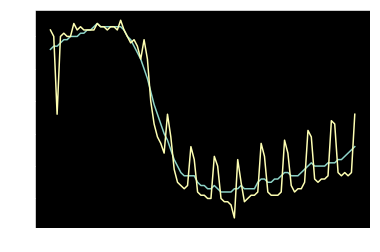

In [17]:
master_df['smooth_workplaces_percent_change_from_baseline'][master_df['CountryName'] == 'United States'].plot()
master_df['workplaces_percent_change_from_baseline'][master_df['CountryName'] == 'United States'].plot()

In [20]:
master_df['smooth'] = 0
master_df['smooth'].iloc[9752:9843] = usa['smooth']

/Users/thomastran/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
master_df

,Unnamed: 0,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,...,residential_percent_change_from_baseline,smooth_GovernmentResponseIndexForDisplay,smooth_ContainmentHealthIndexForDisplay,smooth_EconomicSupportIndexForDisplay,smooth_retail_and_recreation_percent_change_from_baseline,smooth_grocery_and_pharmacy_percent_change_from_baseline,smooth_parks_percent_change_from_baseline,smooth_transit_stations_percent_change_from_baseline,smooth_workplaces_percent_change_from_baseline,smooth_residential_percent_change_from_baseline
0,0,Aruba,ABW,2020-02-15,0.0,NaN,0.0,NaN,0.0,NaN,...,-2.000000,0,0,0,1,0,8,12,-2,0
1,1,Aruba,ABW,2020-02-16,0.0,NaN,0.0,NaN,0.0,NaN,...,2.000000,0,0,0,0,-1,8,10,-7,1
2,2,Aruba,ABW,2020-02-17,0.0,NaN,0.0,NaN,0.0,NaN,...,6.000000,0,0,0,0,-3,8,9,-10,2
3,3,Aruba,ABW,2020-02-18,0.0,NaN,0.0,NaN,0.0,NaN,...,4.000000,0,0,0,0,-4,8,7,-13,2
4,4,Aruba,ABW,2020-02-19,0.0,NaN,0.0,NaN,0.0,NaN,...,4.000000,0,0,0,0,-4,8,6,-15,3
5,5,Aruba,ABW,2020-02-20,0.0,NaN,0.0,NaN,0.0,NaN,...,1.000000,0,0,0,0,-4,8,6,-15,3
6,6,Aruba,ABW,2020-02-21,0.0,NaN,0.0,NaN,0.0,NaN,...,1.000000,0,0,0,0,-4,7,5,-15,3
7,7,Aruba,ABW,2020-02-22,0.0,NaN,0.0,NaN,0.0,NaN,...,-2.000000,0,0,0,0,-4,7,5,-15,3
8,8,Aruba,ABW,2020-02-23,0.0,NaN,0.0,NaN,0.0,NaN,...,-5.000000,0,0,0,0,-3,7,4,-14,3
9,9,Aruba,ABW,2020-02-24,0.0,NaN,0.0,NaN,0.0,NaN,...,18.000000,0,0,0,1,-2,7,4,-12,2


In [26]:
master_df['Day'] = 0
for cc in master_df['CountryCode'].unique():
    index = master_df['Unnamed: 0'][master_df['CountryCode'] == cc]
    start = index.iloc[0]
    days = index.apply(lambda x: x - start)
    master_df['Day'][master_df['CountryCode'] == cc] = days
master_df

/Users/nikhilmehta1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,...,smooth_GovernmentResponseIndexForDisplay,smooth_ContainmentHealthIndexForDisplay,smooth_EconomicSupportIndexForDisplay,smooth_retail_and_recreation_percent_change_from_baseline,smooth_grocery_and_pharmacy_percent_change_from_baseline,smooth_parks_percent_change_from_baseline,smooth_transit_stations_percent_change_from_baseline,smooth_workplaces_percent_change_from_baseline,smooth_residential_percent_change_from_baseline,Day
0,0,Aruba,ABW,2020-02-15,0.0,NaN,0.0,NaN,0.0,NaN,...,0,0,0,1,0,8,12,-2,0,0
1,1,Aruba,ABW,2020-02-16,0.0,NaN,0.0,NaN,0.0,NaN,...,0,0,0,0,-1,8,10,-7,1,1
2,2,Aruba,ABW,2020-02-17,0.0,NaN,0.0,NaN,0.0,NaN,...,0,0,0,0,-3,8,9,-10,2,2
3,3,Aruba,ABW,2020-02-18,0.0,NaN,0.0,NaN,0.0,NaN,...,0,0,0,0,-4,8,7,-13,2,3
4,4,Aruba,ABW,2020-02-19,0.0,NaN,0.0,NaN,0.0,NaN,...,0,0,0,0,-4,8,6,-15,3,4
5,5,Aruba,ABW,2020-02-20,0.0,NaN,0.0,NaN,0.0,NaN,...,0,0,0,0,-4,8,6,-15,3,5
6,6,Aruba,ABW,2020-02-21,0.0,NaN,0.0,NaN,0.0,NaN,...,0,0,0,0,-4,7,5,-15,3,6
7,7,Aruba,ABW,2020-02-22,0.0,NaN,0.0,NaN,0.0,NaN,...,0,0,0,0,-4,7,5,-15,3,7
8,8,Aruba,ABW,2020-02-23,0.0,NaN,0.0,NaN,0.0,NaN,...,0,0,0,0,-3,7,4,-14,3,8
9,9,Aruba,ABW,2020-02-24,0.0,NaN,0.0,NaN,0.0,NaN,...,0,0,0,1,-2,7,4,-12,2,9


In [74]:
mob_cols = [
      'smooth_retail_and_recreation_percent_change_from_baseline',
       'smooth_grocery_and_pharmacy_percent_change_from_baseline',
       'smooth_parks_percent_change_from_baseline',
       'smooth_transit_stations_percent_change_from_baseline',
       'smooth_workplaces_percent_change_from_baseline',
       'smooth_residential_percent_change_from_baseline']
res_cols = [
    'GovernmentResponseIndexForDisplay',
      'ContainmentHealthIndexForDisplay',
      'EconomicSupportIndexForDisplay']

new_df = pd.DataFrame()
new_df['CountryName'] = master_df.CountryName.unique()
new_df['CountryCode'] = master_df.CountryCode.unique()
u30smooth_retail_and_recreation_percent_change_from_baseline =[]
u30smooth_grocery_and_pharmacy_percent_change_from_baseline =[]
u30smooth_parks_percent_change_from_baseline =[]
u30smooth_transit_stations_percent_change_from_baseline=[]
u30smooth_workplaces_percent_change_from_baseline=[]
u30smooth_residential_percent_change_from_baseline=[]

listlist =[
    u30smooth_retail_and_recreation_percent_change_from_baseline,
    u30smooth_grocery_and_pharmacy_percent_change_from_baseline,
    u30smooth_parks_percent_change_from_baseline,
    u30smooth_transit_stations_percent_change_from_baseline,
    u30smooth_workplaces_percent_change_from_baseline,
    u30smooth_residential_percent_change_from_baseline,
]
i = 0
for col in mob_cols: 
    #new_df['day_under30_'+col] = 0
    listy = []
    for cc in master_df['CountryCode'].unique():
        idx = (master_df[col][master_df['CountryCode'] == cc] >= -30).idxmin()
        day = master_df['Day'].iloc[idx]
        #new_df['day_under30_'+col][master_df['CountryCode'] == cc] = day
        listlist[i].append(day)
    new_df['day_under30_'+col] = listlist[i]
    i = i+1
    


In [75]:
new_df

,CountryName,CountryCode,day_under30_smooth_retail_and_recreation_percent_change_from_baseline,day_under30_smooth_grocery_and_pharmacy_percent_change_from_baseline,day_under30_smooth_parks_percent_change_from_baseline,day_under30_smooth_transit_stations_percent_change_from_baseline,day_under30_smooth_workplaces_percent_change_from_baseline,day_under30_smooth_residential_percent_change_from_baseline
0,Aruba,ABW,30,47,33,32,33,0
1,Afghanistan,AFG,43,0,0,44,48,0
2,Angola,AGO,39,45,42,37,41,0
3,United Arab Emirates,ARE,35,46,34,33,39,0
4,Argentina,ARG,30,35,28,31,33,0
5,Australia,AUS,40,0,42,36,45,0
6,Austria,AUT,27,35,32,28,30,0
7,Belgium,BEL,28,39,40,29,30,0
8,Benin,BEN,0,0,0,0,0,0
9,Burkina Faso,BFA,42,0,0,38,0,0


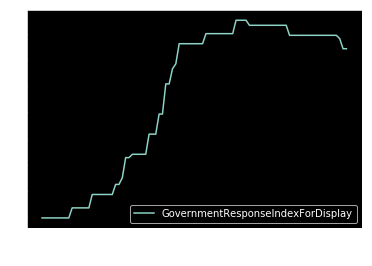

In [76]:
master_df[master_df['CountryCode']=='ARE'].plot('Day', 'GovernmentResponseIndexForDisplay')

In [77]:
y = master_df['GovernmentResponseIndexForDisplay'][master_df['CountryCode']== 'TWN'].iloc[0]
x = (master_df['GovernmentResponseIndexForDisplay'][master_df['CountryCode']== 'TWN'] > y).idxmax()
master_df['Day'].iloc[x]

1

In [78]:
i = 0
First_Inc_GovernmentResponseIndexForDisplay = []
First_Inc_ContainmentHealthIndexForDisplay = []
First_Inc_EconomicSupportIndexForDisplay = []
col_list = [
    First_Inc_GovernmentResponseIndexForDisplay,
    First_Inc_ContainmentHealthIndexForDisplay,
    First_Inc_EconomicSupportIndexForDisplay
]
for col in res_cols:
    for cc in master_df['CountryCode'].unique():
        baseline = master_df[col][master_df['CountryCode']== cc].iloc[0]
        first_inc_idx = (master_df[col][master_df['CountryCode']==cc] > baseline).idxmax()
        first_inc_day = master_df['Day'].iloc[first_inc_idx]
        col_list[i].append(first_inc_day)
    new_df['First_Inc_'+col] = col_list[i]
    i = i+1
new_df

,CountryName,CountryCode,day_under30_smooth_retail_and_recreation_percent_change_from_baseline,day_under30_smooth_grocery_and_pharmacy_percent_change_from_baseline,day_under30_smooth_parks_percent_change_from_baseline,day_under30_smooth_transit_stations_percent_change_from_baseline,day_under30_smooth_workplaces_percent_change_from_baseline,day_under30_smooth_residential_percent_change_from_baseline,First_Inc_GovernmentResponseIndexForDisplay,First_Inc_ContainmentHealthIndexForDisplay,First_Inc_EconomicSupportIndexForDisplay
0,Aruba,ABW,30,47,33,32,33,0,24,24,46
1,Afghanistan,AFG,43,0,0,44,48,0,8,8,0
2,Angola,AGO,39,45,42,37,41,0,11,11,54
3,United Arab Emirates,ARE,35,46,34,33,39,0,9,9,35
4,Argentina,ARG,30,35,28,31,33,0,18,18,37
5,Australia,AUS,40,0,42,36,45,0,26,30,39
6,Austria,AUT,27,35,32,28,30,0,9,9,30
7,Belgium,BEL,28,39,40,29,30,0,11,11,20
8,Benin,BEN,0,0,0,0,0,0,7,7,0
9,Burkina Faso,BFA,42,0,0,38,0,0,23,23,0


In [79]:
new_df.to_csv('decrease_by_30.csv')

In [80]:
cols = [
    'day_under30_smooth_retail_and_recreation_percent_change_from_baseline',
    'day_under30_smooth_grocery_and_pharmacy_percent_change_from_baseline',
    'day_under30_smooth_parks_percent_change_from_baseline',
    'day_under30_smooth_transit_stations_percent_change_from_baseline',
    'day_under30_smooth_workplaces_percent_change_from_baseline',
    'day_under30_smooth_residential_percent_change_from_baseline',
    'First_Inc_GovernmentResponseIndexForDisplay',
    'First_Inc_ContainmentHealthIndexForDisplay',
    'First_Inc_EconomicSupportIndexForDisplay'
]

first_case_day_list = []
for cc in master_df['CountryCode'].unique():
    first_case_idx = (master_df['ConfirmedCases'][master_df['CountryCode'] ==cc] > 0).idxmax()
    first_case_day = master_df['Day'].iloc[first_case_idx]
    first_case_day_list.append(first_case_day)
new_df['First_Case_Day'] = first_case_day_list
new_df

,CountryName,CountryCode,day_under30_smooth_retail_and_recreation_percent_change_from_baseline,day_under30_smooth_grocery_and_pharmacy_percent_change_from_baseline,day_under30_smooth_parks_percent_change_from_baseline,day_under30_smooth_transit_stations_percent_change_from_baseline,day_under30_smooth_workplaces_percent_change_from_baseline,day_under30_smooth_residential_percent_change_from_baseline,First_Inc_GovernmentResponseIndexForDisplay,First_Inc_ContainmentHealthIndexForDisplay,First_Inc_EconomicSupportIndexForDisplay,First_Case_Day
0,Aruba,ABW,30,47,33,32,33,0,24,24,46,27
1,Afghanistan,AFG,43,0,0,44,48,0,8,8,0,10
2,Angola,AGO,39,45,42,37,41,0,11,11,54,36
3,United Arab Emirates,ARE,35,46,34,33,39,0,9,9,35,0
4,Argentina,ARG,30,35,28,31,33,0,18,18,37,18
5,Australia,AUS,40,0,42,36,45,0,26,30,39,0
6,Austria,AUT,27,35,32,28,30,0,9,9,30,11
7,Belgium,BEL,28,39,40,29,30,0,11,11,20,0
8,Benin,BEN,0,0,0,0,0,0,7,7,0,31
9,Burkina Faso,BFA,42,0,0,38,0,0,23,23,0,25


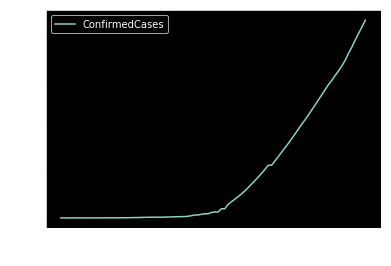

In [81]:
master_df[master_df['CountryCode'] == 'ARE'].plot('Day', 'ConfirmedCases')

In [82]:
adjusted_day = new_df
for col in cols:
    adjusted_day[col] = adjusted_day[col] - new_df['First_Case_Day']
adjusted_day

,CountryName,CountryCode,day_under30_smooth_retail_and_recreation_percent_change_from_baseline,day_under30_smooth_grocery_and_pharmacy_percent_change_from_baseline,day_under30_smooth_parks_percent_change_from_baseline,day_under30_smooth_transit_stations_percent_change_from_baseline,day_under30_smooth_workplaces_percent_change_from_baseline,day_under30_smooth_residential_percent_change_from_baseline,First_Inc_GovernmentResponseIndexForDisplay,First_Inc_ContainmentHealthIndexForDisplay,First_Inc_EconomicSupportIndexForDisplay,First_Case_Day
0,Aruba,ABW,3,20,6,5,6,-27,-3,-3,19,27
1,Afghanistan,AFG,33,-10,-10,34,38,-10,-2,-2,-10,10
2,Angola,AGO,3,9,6,1,5,-36,-25,-25,18,36
3,United Arab Emirates,ARE,35,46,34,33,39,0,9,9,35,0
4,Argentina,ARG,12,17,10,13,15,-18,0,0,19,18
5,Australia,AUS,40,0,42,36,45,0,26,30,39,0
6,Austria,AUT,16,24,21,17,19,-11,-2,-2,19,11
7,Belgium,BEL,28,39,40,29,30,0,11,11,20,0
8,Benin,BEN,-31,-31,-31,-31,-31,-31,-24,-24,-31,31
9,Burkina Faso,BFA,17,-25,-25,13,-25,-25,-2,-2,-25,25


In [83]:
adjusted_day.to_csv('adjusted_day.csv')